<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_da/da11_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame 합치기

* merge(join): 두 개의 DataFrame을 공통된 컬럼(들)을 기준으로 합치는 것.
* concat: DataFrame을 축(axis)을 따라서 합치는 것.


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# merge

In [3]:
emp = pd.DataFrame({
    'empno': [100, 101, 102, 103],
    'ename': ['Scott', 'King', 'Allen', 'Tiger'],
    'deptno': [10, 20, 10, 50]
})
emp

,empno,ename,deptno
0,100,Scott,10
1,101,King,20
2,102,Allen,10
3,103,Tiger,50


In [4]:
dept = pd.DataFrame({
    'deptno': [10, 20, 30],
    'dname': ['IT', 'HR', 'Sales']
})
dept

,deptno,dname
0,10,IT
1,20,HR
2,30,Sales


In [7]:
# pd.merge 함수
pd.merge(emp, dept, how='inner', on='deptno')
# how: join 방식. inner, left, right, outer. inner는 생략가능(default argument)
# on: join의 기준이 되는 컬럼(들의 리스트). 컬럼 이름이 같은 경우에는 on도 생략 가능.

,empno,ename,deptno,dname
0,100,Scott,10,IT
1,102,Allen,10,IT
2,101,King,20,HR


In [9]:
# pd.DataFrame.merge 메서드
emp.merge(dept)

,empno,ename,deptno,dname
0,100,Scott,10,IT
1,102,Allen,10,IT
2,101,King,20,HR


In [10]:
# left (outer) join
pd.merge(emp, dept, how='left')  # on='deptno' 생략 가능.

,empno,ename,deptno,dname
0,100,Scott,10,IT
1,101,King,20,HR
2,102,Allen,10,IT
3,103,Tiger,50,NaN


In [12]:
# right (outer) join
pd.merge(emp, dept, how='right')

,empno,ename,deptno,dname
0,100.0,Scott,10,IT
1,102.0,Allen,10,IT
2,101.0,King,20,HR
3,NaN,NaN,30,Sales


In [13]:
# full outer join
pd.merge(emp, dept, how='outer')

,empno,ename,deptno,dname
0,100.0,Scott,10,IT
1,102.0,Allen,10,IT
2,101.0,King,20,HR
3,103.0,Tiger,50,NaN
4,NaN,NaN,30,Sales


join 기준이 되는 컬럼 이름이 서로 다른 경우

In [14]:
employees = pd.DataFrame({
    'empno': [100, 101, 102, 103],
    'ename': ['Scott', 'King', 'Allen', 'Tiger'],
    'deptno': [10, 20, 10, 50]
})
employees

,empno,ename,deptno
0,100,Scott,10
1,101,King,20
2,102,Allen,10
3,103,Tiger,50


In [15]:
departments = pd.DataFrame({
    'dno': [10, 20, 30],
    'dname': ['IT', 'HR', 'Sales']
})
departments

,dno,dname
0,10,IT
1,20,HR
2,30,Sales


In [16]:
pd.merge(employees, departments, how='inner', left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,100,Scott,10,10,IT
1,102,Allen,10,10,IT
2,101,King,20,20,HR


인덱스를 사용한 merge

In [18]:
np.random.seed(1)

df1 = pd.DataFrame(data={'value1': np.random.randint(10, size=6), 
                         'value2': np.random.randint(100, size=6)},
                   index=['a', 'b', 'c'] * 2)
df1

,value1,value2
a,5,1
b,8,76
c,9,71
a,5,6
b,0,25
c,0,50


In [19]:
np.random.seed(2)

df2 = pd.DataFrame(data={'data1': np.random.rand(3),
                         'data2': np.random.randn(3)},
                   index=['a', 'b', 'c'])
df2

,data1,data2
a,0.435995,-1.953796
b,0.025926,-1.586882
c,0.549662,-1.074456


In [20]:
pd.merge(df1, df2, how='inner', left_index=True, right_index=True)

,value1,value2,data1,data2
a,5,1,0.435995,-1.953796
a,5,6,0.435995,-1.953796
b,8,76,0.025926,-1.586882
b,0,25,0.025926,-1.586882
c,9,71,0.549662,-1.074456
c,0,50,0.549662,-1.074456


컬럼과 인덱스를 사용한 merge

In [21]:
df1 = pd.DataFrame(data={'value1': np.arange(6),
                         'value2': ['a', 'b', 'c'] * 2})
df1

,value1,value2
0,0,a
1,1,b
2,2,c
3,3,a
4,4,b
5,5,c


In [22]:
df2 = pd.DataFrame(data={'data': [10, 20, 30]},
                   index=['a', 'b', 'c'])
df2

,data
a,10
b,20
c,30


In [25]:
pd.merge(df1, df2, how='inner', left_on='value2', right_index=True)

,value1,value2,data
0,0,a,10
3,3,a,10
1,1,b,20
4,4,b,20
2,2,c,30
5,5,c,30


# concat

## pd.Series의 concat

In [26]:
s1 = pd.Series(data=['a', 'b', 'c'])
s1

0    a
1    b
2    c
dtype: object

In [27]:
s2 = pd.Series(data=['d', 'e'])
s2

0    d
1    e
dtype: object

In [29]:
result = pd.concat([s1, s2], axis=0)  # axis=0은 생략 가능(defualt argument)
result  #> 결과는 Series

0    a
1    b
2    c
0    d
1    e
dtype: object

In [31]:
result.loc[0]

0    a
0    d
dtype: object

In [33]:
pd.concat([s1, s2], ignore_index=True)
# ignore_index: 이어줄 Series 또는 DataFrame의 index를 무시할 지를 결정. 기본값은 False.

0    a
1    b
2    c
3    d
4    e
dtype: object

axis=1 방향 concat

In [35]:
pd.concat([s1, s2], axis=1)  #> 결과는 DataFrame

,0,1
0,a,d
1,b,e
2,c,NaN


In [36]:
np.random.seed(1)
s1 = pd.Series(data=np.random.randn(3), index=['a', 'b', 'c'])
s2 = pd.Series(data=np.random.randn(3), index=['d', 'e', 'f'])

In [38]:
s1

a    1.624345
b   -0.611756
c   -0.528172
dtype: float64

In [39]:
s2

d   -1.072969
e    0.865408
f   -2.301539
dtype: float64

In [37]:
# axis=0 방향 concat => 결과는 Series
pd.concat([s1, s2])

a    1.624345
b   -0.611756
c   -0.528172
d   -1.072969
e    0.865408
f   -2.301539
dtype: float64

In [40]:
# axis=1 방향 concat => 결과는 (6, 2) shape의 DataFrame
pd.concat([s1, s2], axis=1)

,0,1
a,1.624345,NaN
b,-0.611756,NaN
c,-0.528172,NaN
d,NaN,-1.072969
e,NaN,0.865408
f,NaN,-2.301539


## pandas.DataFrame의 concat

In [43]:
np.random.seed(1)

mid_term = pd.DataFrame(data=np.random.randint(100, size=(5, 3)),
                        columns=['math', 'science', 'computer'])
final_term = pd.DataFrame(data=np.random.randint(100, size=(5, 3)),
                          columns=['math', 'science', 'computer'])

In [44]:
mid_term

,math,science,computer
0,37,12,72
1,9,75,5
2,79,64,16
3,1,76,71
4,6,25,50


In [45]:
final_term

,math,science,computer
0,20,18,84
1,11,28,29
2,14,50,68
3,87,87,94
4,96,86,13


In [47]:
# axis=0 concat
pd.concat([mid_term, final_term], ignore_index=True)

,math,science,computer
0,37,12,72
1,9,75,5
2,79,64,16
3,1,76,71
4,6,25,50
5,20,18,84
6,11,28,29
7,14,50,68
8,87,87,94
9,96,86,13


In [48]:
# axis=1 concat
pd.concat([mid_term, final_term], axis=1)

,math,science,computer,math,science,computer
0,37,12,72,20,18,84
1,9,75,5,11,28,29
2,79,64,16,14,50,68
3,1,76,71,87,87,94
4,6,25,50,96,86,13


In [51]:
np.random.seed(1)

df1 = pd.DataFrame(data=np.random.rand(3, 3),
                   index=['a', 'b', 'c'],
                   columns=['data1', 'data2', 'data3'])
df2 = pd.DataFrame(data=np.random.rand(2, 2),
                   index=['a', 'b'],
                   columns=['data2', 'data3'])

In [52]:
df1

,data1,data2,data3
a,0.417022,0.720324,0.000114
b,0.302333,0.146756,0.092339
c,0.186260,0.345561,0.396767


In [53]:
df2

,data2,data3
a,0.538817,0.419195
b,0.685220,0.204452


In [54]:
# axis=0 concat
pd.concat([df1, df2])

,data1,data2,data3
a,0.417022,0.720324,0.000114
b,0.302333,0.146756,0.092339
c,0.186260,0.345561,0.396767
a,NaN,0.538817,0.419195
b,NaN,0.685220,0.204452


In [57]:
# axis=1 concat
pd.concat([df1, df2], axis=1)

,data1,data2,data3,data2,data3
a,0.417022,0.720324,0.000114,0.538817,0.419195
b,0.302333,0.146756,0.092339,0.685220,0.204452
c,0.186260,0.345561,0.396767,NaN,NaN


# merge, concat 연습

* https://github.com/pandas-dev/pandas/tree/master/doc/data/ 데이터 사용
* air_quality_no2_long.csv, air_quality_pm25_long.csv, air_quality_stations.csv 파일을 읽고 데이터 프레임 생성.
* air_quality_no2와 air_quality_pm25를 합치세요.
* 위 결과 데이터프레임과 stations 데이터프레임을 합치세요.

In [58]:
# 파일 경로
no2_data = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_no2_long.csv'
pm25_data = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_pm25_long.csv'
stations_data = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_stations.csv'

In [59]:
air_quality_no2 = pd.read_csv(no2_data)

In [60]:
air_quality_no2
#> 공기 중 NO2의 농도를 3개 도시에서 1시간 간격으로 측정한 데이터

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [61]:
air_quality_no2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [63]:
# city의 unique한 값 - pd.unique(Series/Array/List) 함수, pd.Series.unique() 메서드
# pd.unique(air_quality_no2['city'])
air_quality_no2['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [64]:
# country의 unique 값
air_quality_no2['country'].unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [65]:
# location의 unique 값
air_quality_no2['location'].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [66]:
# parameter의 unique 값
air_quality_no2['parameter'].unique()

array(['no2'], dtype=object)

In [67]:
air_quality_pm25 = pd.read_csv(pm25_data)
# 지름이 2.5um 이하인 미세먼지의 공기 중 농도를 2개 도시에서 1시간 간격으로 측정한 데이터

In [68]:
air_quality_pm25

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [69]:
air_quality_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1110 non-null   object 
 1   country    1110 non-null   object 
 2   date.utc   1110 non-null   object 
 3   location   1110 non-null   object 
 4   parameter  1110 non-null   object 
 5   value      1110 non-null   float64
 6   unit       1110 non-null   object 
dtypes: float64(1), object(6)
memory usage: 60.8+ KB


In [70]:
air_quality_pm25['city'].unique()

array(['Antwerpen', 'London'], dtype=object)

In [71]:
air_quality_pm25['location'].unique()

array(['BETR801', 'London Westminster'], dtype=object)

In [72]:
air_quality_pm25['parameter'].unique()

array(['pm25'], dtype=object)

In [73]:
stations = pd.read_csv(stations_data)
# 미세먼지 측정소 이름, 경도, 위도 정보를 가지고 있는 데이터 프레임

In [74]:
stations

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226
...,...,...,...
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216


In [76]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               66 non-null     object 
 1   coordinates.latitude   66 non-null     float64
 2   coordinates.longitude  66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [77]:
# NO2, PM25를 concat
air_quality = pd.concat([air_quality_no2, air_quality_pm25], ignore_index=True)

In [78]:
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [79]:
# air_quality와 stations를 merge
result = pd.merge(air_quality, stations)
# how='inner', on='location' 생략 가능

In [80]:
result

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.39390
1,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83722,2.39390
2,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.39390
3,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83722,2.39390
4,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.39390
...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


In [81]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   4182 non-null   object 
 1   country                4182 non-null   object 
 2   date.utc               4182 non-null   object 
 3   location               4182 non-null   object 
 4   parameter              4182 non-null   object 
 5   value                  4182 non-null   float64
 6   unit                   4182 non-null   object 
 7   coordinates.latitude   4182 non-null   float64
 8   coordinates.longitude  4182 non-null   float64
dtypes: float64(3), object(6)
memory usage: 326.7+ KB


In [84]:
air_quality['location'].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [87]:
stations[stations.location == 'FR04014']

,location,coordinates.latitude,coordinates.longitude
26,FR04014,48.83724,2.3939
27,FR04014,48.83722,2.3939


London의 NO2, PM25의 시간에 따른 변화를 시각화

In [89]:
# 데이터프레임의 date.utc 컬럼의 데이터 타입을 'datetime64'으로 변환
result['date.utc'] = result['date.utc'].astype('datetime64')

In [90]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   city                   4182 non-null   object        
 1   country                4182 non-null   object        
 2   date.utc               4182 non-null   datetime64[ns]
 3   location               4182 non-null   object        
 4   parameter              4182 non-null   object        
 5   value                  4182 non-null   float64       
 6   unit                   4182 non-null   object        
 7   coordinates.latitude   4182 non-null   float64       
 8   coordinates.longitude  4182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 326.7+ KB


In [92]:
# result에서 영국 런던 데이터만 선택
london = result[result.city == 'London']

In [93]:
london

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
2204,London,GB,2019-06-17 11:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2205,London,GB,2019-06-17 10:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2206,London,GB,2019-06-17 09:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2207,London,GB,2019-06-17 08:00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
2208,London,GB,2019-06-17 07:00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


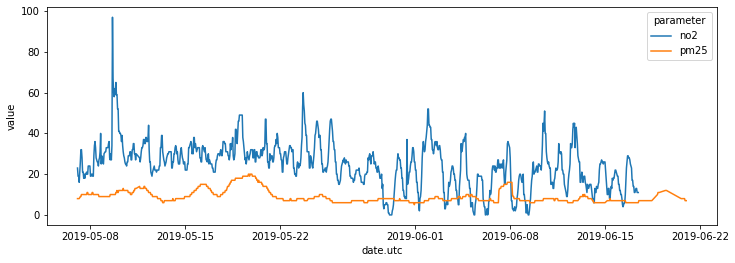

In [99]:
fig = plt.figure(figsize=(12, 4))
sns.lineplot(data=london, x='date.utc', y='value', hue='parameter')
plt.show()

# babynames 데이터 셋

* https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/babynames/ 데이터 파일들을 사용
* 1880년부터 2010년까지 미국 신생아들의 이름, 성별, 출생자수가 정리된 파일
* 파일을 하나씩 읽어서 데이터 프레임 생성하세요.
* 생성된 데이터 프레임에 year 컬럼을 추가하세요.
* 생성된 131개의 데이터 프레임을 하나로 합치세요.
* 연도별 신생아 수를 찾고 그래프를 그리세요.
* 연도별 성별 신생아 수를 찾고 그래프를 그리세요.

In [ ]:
file_path = f'https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/babynames/yob{}.txt'